#**LangChain Course**

#**Install the Packages**

In [1]:
!pip install langchain
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 8.6 MB/s eta 0:00:00


In [2]:
from secret_key import openapi_key
import os
os.environ['OPENAI_API_KEY'] = openapi_key

#import os
#os.environ['OPENAI_API_KEY'] = "add your key here"

##**Large Language Models**

Get Prediction from a Large Language Model

The basic building block of LangChain is a Large Language Model which takes text as input and generates more text

Suppose we want to generate a company name based on the company description, so we will first initialize an OpenAI wrapper. In this case, since we want the output to be more random, we will intialize our model with high temprature.

The temperature parameter adjusts the randomness of the output. Higher values like 0.7 will make the output more random, while lower values like 0.2 will make it more focused and deterministic.

temperature value--> how creative we want our model to be

0 ---> temperature it means model is  very safe it is not taking any bets.

1 --> it will take risk it might generate wrong output but it is very creative

#**Example 1**

In [3]:
from langchain.llms import OpenAI
llm = OpenAI(temperature=0.9)

And now we will pass in text and get  predictions

In [ ]:
llm.predict("What would be a good company name for a company that makes colorful socks?")


'\n\nRainbow Toes Socks'

#**Example 2**

In [ ]:
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.9)
name = llm.predict("I want to open a restaurant for Chinese food. Suggest a fency name for this.")
print(name)



Dragon Palace Express


In [ ]:
llm("I want to open a restaurant for Chinese food. Suggest a fency name for this.")

"\n\nLing's Imperial Palace."

##**Prompt Templates**

In many Large Language Model applications we donot pass the user input directly to the Large Language Model, we add the user input to a large piece of text called prompt template

#**Example 1**

In [4]:
from langchain.prompts import PromptTemplate
prompt = PromptTemplate.from_template("What is a good name for a company that makes {product}")
prompt.format(product="colorful socks")

'What is a good name for a company that makes colorful socks'

#**Example 2**

In [5]:
from langchain.prompts import PromptTemplate

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)
p = prompt_template_name.format(cuisine="Italian")
print(p)

# print(llm.predict(p))

I want to open a restaurant for Italian food. Suggest a fency name for this.


##**Chains**

Now as we have the  **model**:


  llm = OpenAI(temperature=0.9)


and the **Prompt Template**:

prompt = PromptTemplate.from_template("What is a good name for a company that makes {product}")


prompt.format(product="colorful socks")


Now using Chains we will link together model and the PromptTemplate and other Chains

The simplest and most common type of Chain is LLMChain, which passes the input first to Prompt Template and then to Large Language Model

LLMChain is responsible to execute the PromptTemplate, For every PromptTemplate we will specifically have an LLMChain

#**Example 1**

In [6]:
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.9)

In [7]:
from langchain.prompts import PromptTemplate
prompt = PromptTemplate.from_template("What is a good name for a company that makes {product}")

Whatever input text i am giving that will get assigned to this particular variable that is **product**

In [8]:
from langchain.chains import LLMChain

chain = LLMChain(llm=llm, prompt=prompt)
chain.run("colorful socks")

'\n\nFancy Feet Socks.'

#**Example 2**

In [9]:
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.9)

In [10]:
from langchain.prompts import PromptTemplate

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

In [11]:
from langchain.chains import LLMChain

chain = LLMChain(llm=llm, prompt=prompt_template_name)
chain.run("Mexican")

' \n\nTaco Tierra'

In [12]:
chain = LLMChain(llm=llm, prompt=prompt_template_name, verbose=True)
chain.run("Mexican")



> Entering new  chain...
Prompt after formatting:
I want to open a restaurant for Mexican food. Suggest a fency name for this.

> Finished chain.


'\n\nCasa de Fuego'

#**Can we combine Multiple PromptTemplates, We will try to combine Multiple PromptTemplates**

#**The output from the first PromptTemplate is passed to the next PromptTemplate as input**

#**To comine the Chain and  to set a sequence for that we use SimpleSequentialChain**

##**Simple Sequential Chain**

In [ ]:
llm = OpenAI(temperature=0.6)

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

name_chain =LLMChain(llm=llm, prompt=prompt_template_name)

prompt_template_items = PromptTemplate(
    input_variables = ['restaurant_name'],
    template="""Suggest some menu items for {restaurant_name}"""
)

food_items_chain = LLMChain(llm=llm, prompt=prompt_template_items)

In [ ]:
from langchain.chains import SimpleSequentialChain
chain = SimpleSequentialChain(chains = [name_chain, food_items_chain])

content = chain.run("Pakistani")
print(content)



- Chicken Tikka Masala
- Vegetable Korma
- Lamb Rogan Josh
- Saag Paneer
- Aloo Gobi
- Chana Masala
- Biryani Rice
- Naan Bread
- Raita
- Mango Lassi


#**There is a issue with SimpleSequentialChain it only shows last input information**

#**To show the entire information i will use SequentialChain**

##**Sequential Chain**

In [13]:
llm = OpenAI(temperature=0.7)

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

name_chain =LLMChain(llm=llm, prompt=prompt_template_name, output_key="restaurant_name")

In [14]:
llm = OpenAI(temperature=0.7)

prompt_template_items = PromptTemplate(
    input_variables = ['restaurant_name'],
    template="Suggest some menu items for {restaurant_name}."
)

food_items_chain =LLMChain(llm=llm, prompt=prompt_template_items, output_key="menu_items")

In [15]:
from langchain.chains import SequentialChain

chain = SequentialChain(
    chains = [name_chain, food_items_chain],
    input_variables = ['cuisine'],
    output_variables = ['restaurant_name', "menu_items"]
)

In [16]:
chain({"cuisine": "Pakistani"})

{'cuisine': 'Pakistani',
 'restaurant_name': '\n\nMasala Fusion',
 'menu_items': '\n\n• Vegetable Samosa Chaat\n• Aloo Tikki Chaat\n• Paneer Tikka Masala\n• Palak Paneer \n• Makhani Dal \n• Kashmiri Pulao \n• Malai Kofta \n• Bhindi Masala \n• Vegetable Biryani \n• Paneer Butter Masala \n• Naan \n• Gulab Jamun \n• Rasmalai'}

##**Agents**

Agent is a very powerful concept in LangChain

For example I have to travel from Dubai to Canada, I type this in ChatGPT



---> Give me  two flight options from Dubai to Canada on September 1, 2023 | ChatGPT will not be able to answer because has knowledge till
September 2021



ChatGPT plus has Expedia Plugin, if we enable this plugin it will go to Expedia Plugin and will try to pull information about Flights & it will show the information

#**What exactly happens when we try to enable this plugin**

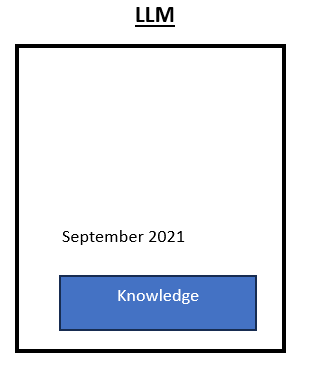

When we think about LLM. Many people think that it is just a knowledge engine, it has knowledge and it will try to give answer based on that knowledge but the knowledge is only limited to September 2021. The think that most people missout is that Large Lanaguage Model has a reasoning engine, and using that reasoning engine it can figure out when someone types this type of Question


Give me  two flight options from Dubai to Canada on September 1, 2023


As a human we go to Expedia as we have a reasoning engine in our brain.

LLM has a reasoning engine as well, so it will figure out the Source, Destination, Date and it will call Expedia Plugin and it will return response back.

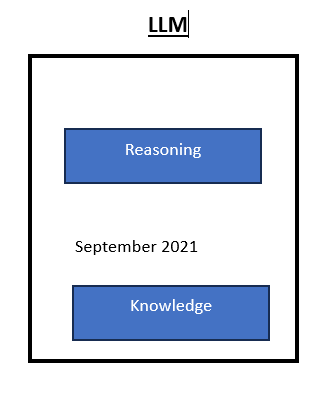

#**How much is US GDP in 2022? plus 5**





As LLM has a reasoning engine to answer that question it will go to Google Search Tool, it will find that answer and then it will use Math Tool and do plus 5

#**An agent has access to a suite of tools, and determines which ones to use depending on the user input.**

#Agent will conenct with external tools and it will use LLM reasoning capabilities

#All the tools like Google Search Tool and Math Tool are available as part of LangChain and you can configure  agent, so agent is nothing but using all these tools and LLM reasoning capabilities to perform a given task  

#### serpapi and llm-math tool

If you're using a text LLM, first try zero-shot-react-description, aka. the MRKL agent for LLMs.


If you're using a Chat Model, try chat-zero-shot-react-description, aka. the MRKL agent for Chat Models.


If you're using a Chat Model and want to use memory, try chat-conversational-react-description, the Conversational agent.


If you have a complex task that requires many steps and you're interested in experimenting with a new type of agent, try the Plan-and-Execute agent.

In [5]:
!pip install google-search-results


  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32002 sha256=1622fb4421fa6ac1165cb5e7e6b665508596676e614aa28d182cffa6e008cda7
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results


SerpApi is a real-time API to access Google search results.

In [8]:
from secret_key import serpapi_key,openapi_key
import os

os.environ['SERPAPI_API_KEY'] = serpapi_key

os.environ['OPENAI_API_KEY'] = openapi_key

In [10]:
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain.llms import OpenAI

llm = OpenAI(temperature=0)
#Google Search API
# The tools we'll give the Agent access to. Note that the 'llm-math' tool uses an LLM, so we need to pass that in.
tools = load_tools(["serpapi", "llm-math"], llm=llm)

# Finally, let's initialize an agent with the tools, the language model, and the type of agent we want to use.
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

# Let's test it out!
agent.run("What was the GDP of US in 2022 plus 5?")



> Entering new  chain...
 I need to find the GDP of US in 2022
Action: Search
Action Input: US GDP in 2022
Observation: 25462.70 USD Billion
Thought: I need to add 5 to this number
Action: Calculator
Action Input: 25462.70 + 5
Observation: Answer: 25467.7
Thought: I now know the final answer
Final Answer: 25467.7 USD Billion

> Finished chain.


'25467.7 USD Billion'

#### Wikipedia and llm-math tool

In [12]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=450c851d68af7fa41013183b8c2384dad490965f568e569f22a18c5dc022e165
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [13]:
# install this package: pip install wikipedia

# The tools we'll give the Agent access to. Note that the 'llm-math' tool uses an LLM, so we need to pass that in.
tools = load_tools(["wikipedia", "llm-math"], llm=llm)

# Finally, let's initialize an agent with the tools, the language model, and the type of agent we want to use.
agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Let's test it out!
agent.run("When was Elon musk born? What is his age right now in 2023?")



> Entering new  chain...
 I need to find out when Elon Musk was born and then calculate his age.
Action: Wikipedia
Action Input: Elon Musk
Observation: Page: Elon Musk
Summary: Elon Reeve Musk ( EE-lon; born June 28, 1971) is a business magnate and investor. He is the founder, CEO and chief engineer of SpaceX; angel investor, CEO and product architect of Tesla, Inc.; founder, owner, CTO and chairman of X Corp. and Twitter; founder of the Boring Company; co-founder of Neuralink and OpenAI; and president of the philanthropic Musk Foundation. Musk is the wealthiest person in the world, with an estimated net worth, as of July 6, 2023, of around US$248 billion according to the Bloomberg Billionaires Index and $251.1 billion according to Forbes's Real Time Billionaires list, primarily from his ownership stakes in Tesla and SpaceX.Musk was born in Pretoria, South Africa, and briefly attended the University of Pretoria before moving to Canada at age 18, acquiring citizenship through his Cana

'Elon Musk was born on June 28, 1971 and is currently 52 years old in 2023.'

##**Memory**

Chatbot application like ChatGPT, you will notice that it remember past information

In [14]:
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.9)

In [15]:
from langchain.prompts import PromptTemplate

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

In [19]:
from langchain.chains import LLMChain

chain = LLMChain(llm=llm,prompt=prompt_template_name)
name = chain.run("Mexican")
print(name)



Taco Cabana Fiesta


In [20]:
name = chain.run("Indian")
print(name)



Spice of India


In [21]:
chain.memory

In [22]:
type(chain.memory)

NoneType

##**ConversationBufferMemory**

We can attach memory to remember all previous conversation

In [23]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory()

chain = LLMChain(llm=llm, prompt=prompt_template_name, memory=memory)
name = chain.run("Mexican")
print(name)



"El Sabor Mexicano"


In [24]:
name = chain.run("Arabic")
print(name)

 

Al-Laham Palace


In [25]:
print(chain.memory.buffer)

Human: Mexican
AI: 

"El Sabor Mexicano"
Human: Arabic
AI:  

Al-Laham Palace


##**ConversationChain**

Conversation buffer memory goes growing endlessly

Just remember last 5 Conversation Chain

Just remember last 10-20 Conversation Chain

In [26]:
from langchain.chains import ConversationChain

convo = ConversationChain(llm=OpenAI(temperature=0.7))
print(convo.prompt.template)

The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
{history}
Human: {input}
AI:


In [27]:
convo.run("Who won the first cricket world cup?")

' The first cricket world cup was held in 1975 and was won by the West Indies.'

In [28]:
convo.run("How much is 5+5?")

' 10.'

In [29]:
convo.run("Who was the captain ofthe winning team?")

' The captain of the West Indies team in the 1975 cricket world cup was Clive Lloyd.'

In [30]:
print(convo.memory.buffer)

Human: Who won the first cricket world cup?
AI:  The first cricket world cup was held in 1975 and was won by the West Indies.
Human: How much is 5+5?
AI:  10.
Human: Who was the captain ofthe winning team?
AI:  The captain of the West Indies team in the 1975 cricket world cup was Clive Lloyd.


##**ConversationBufferWindowMemory**

In [31]:
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=1)

convo = ConversationChain(
    llm=OpenAI(temperature=0.7),
    memory=memory
)
convo.run("Who won the first cricket world cup?")

' The first cricket world cup was won by the West Indies in 1975. They defeated Australia by 17 runs in the final.'

In [32]:
convo.run("How much is 5+5?")

' 5+5 is 10.'

In [33]:
convo.run("Who was the captain of the winning team?")

" I'm sorry, I don't know the answer to that question. Can you provide me more context so I can help you?"